In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
train_df = pd.read_csv('data/ais_train.csv', sep='|')
test_df = pd.read_csv('data/ais_test.csv')

# Label encode the vesselId
le = LabelEncoder()
train_df['vesselId'] = le.fit_transform(train_df['vesselId'])
test_df['vesselId'] = le.transform(test_df['vesselId'])

le_port = LabelEncoder()
train_df['portId'] = le_port.fit_transform(train_df['portId'])

# Drop etaRaw column
train_df = train_df.drop(columns=['etaRaw'])

# Convert timestamps to datetime
train_df['time'] = pd.to_datetime(train_df['time'])
test_df['time'] = pd.to_datetime(test_df['time'])

# Convert time to features
train_df['hour'] = train_df['time'].dt.hour
train_df['weekday'] = train_df['time'].dt.weekday
train_df['month'] = train_df['time'].dt.month
train_df['day'] = train_df['time'].dt.day

test_df['hour'] = test_df['time'].dt.hour
test_df['weekday'] = test_df['time'].dt.weekday
test_df['month'] = test_df['time'].dt.month
test_df['day'] = test_df['time'].dt.day

# Drop the time column
train_df = train_df.drop(columns=['time'])
test_df = test_df.drop(columns=['time'])

display(train_df.head())
display(test_df.head())

,cog,sog,rot,heading,navstat,latitude,longitude,vesselId,portId,hour,weekday,month,day
0,284.0,0.7,0,88,0,-34.74370,-57.85130,50,40,0,0,1,1
1,109.6,0.0,-6,347,1,8.89440,-79.47939,189,674,0,0,1,1
2,111.0,11.0,0,112,0,39.19065,-76.47567,432,353,0,0,1,1
3,96.4,0.0,0,142,1,-34.41189,151.02067,110,18,0,0,1,1
4,214.0,19.7,0,215,0,35.88379,-5.91636,356,605,0,0,1,1


,ID,vesselId,scaling_factor,hour,weekday,month,day
0,0,84,0.3,0,2,5,8
1,1,623,0.3,0,2,5,8
2,2,596,0.3,0,2,5,8
3,3,542,0.3,0,2,5,8
4,4,1,0.3,0,2,5,8


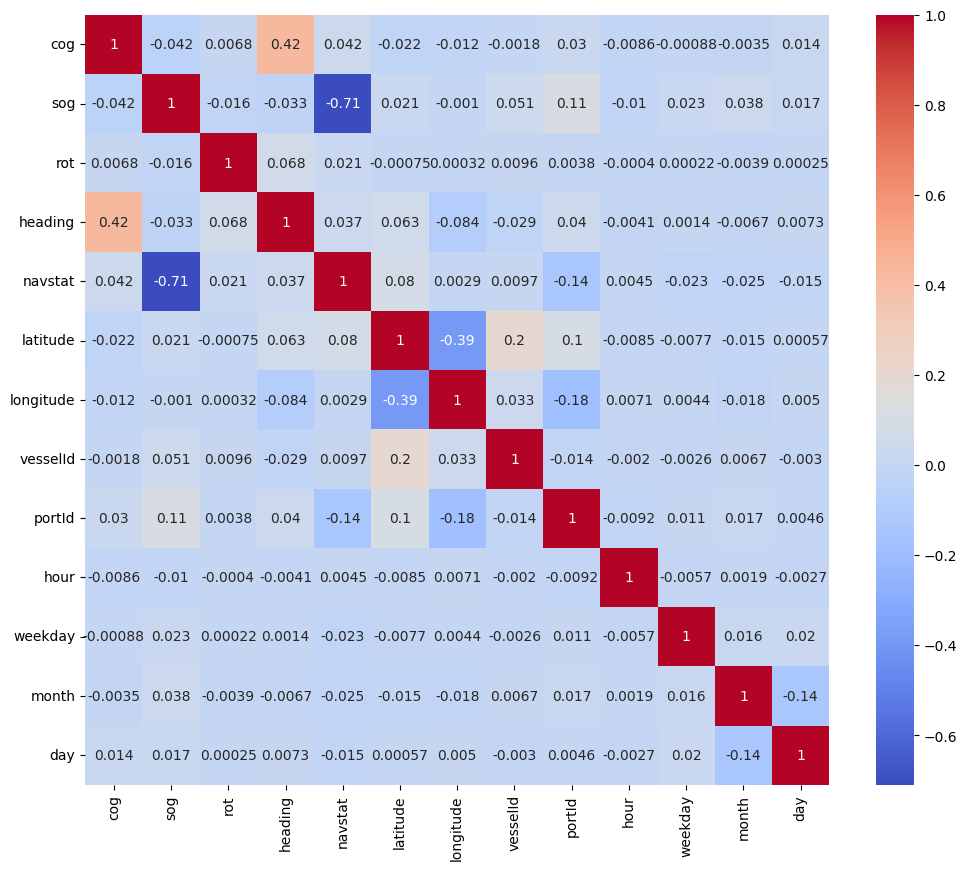

In [4]:
# Correlation matrix
corr = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Found 76104 outliers


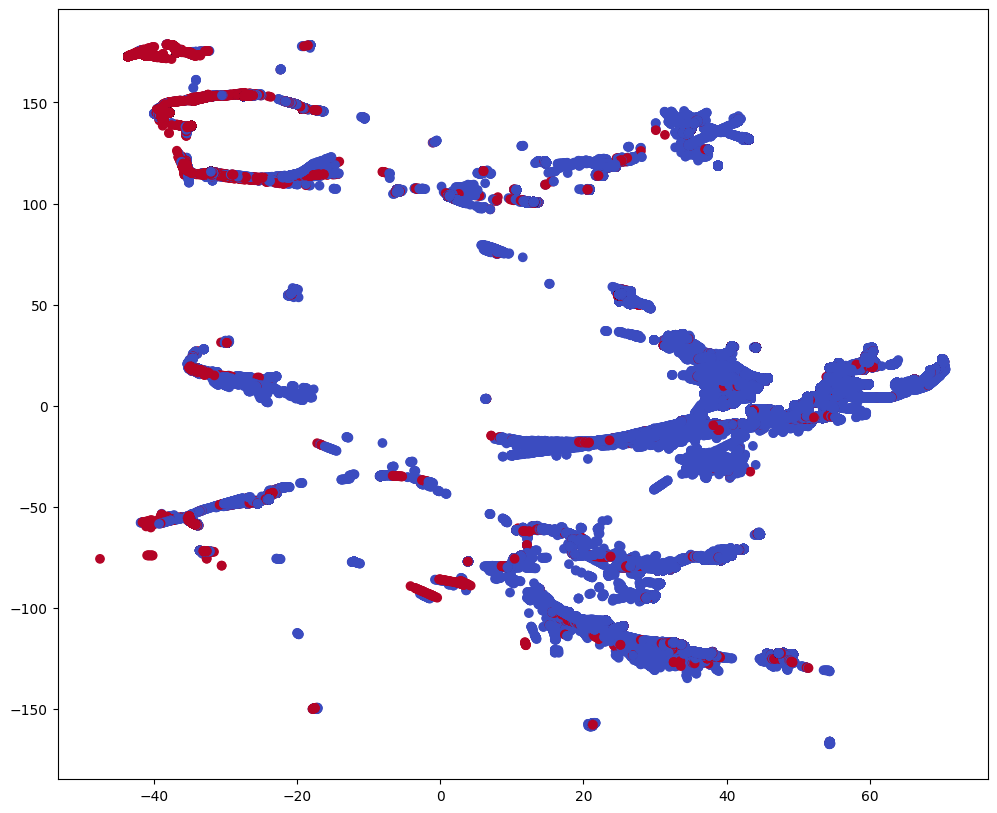

In [7]:
# find outliers
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05)
clf.fit(train_df)
outliers = clf.predict(train_df)
outliers = outliers == -1
print(f'Found {sum(outliers)} outliers')

# Plot the outliers
plt.figure(figsize=(12, 10))
plt.scatter(train_df['latitude'], train_df['longitude'], c=outliers, cmap='coolwarm')
plt.show()